<h1><center><strong>CX 4803<br><br>Homework 8</strong></center></h1>
<h3><center><i>Dylan Both</i></center></h3>

In [2]:
# imports
import csv
import numpy as np
import pandas as pd
from scipy import linalg
import seaborn as sns
import matplotlib.pyplot as plt
import random as rand
import math
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
from sklearn.svm import SVC

## Problem 1:
In this problem we will explore how adjusting the parameter $C$ in a support vector machine to change how we penalize being on the wrong side of the margin affects our classification of the data in the file HW/hw8_q1.csv.

### 1(a):
We begin by reading in the data and taking a look at it.

In [51]:
# read in the data
X = np.loadtxt('hw8_q1.csv', delimiter=',', usecols=(0, 1), unpack=True, dtype=float)
X = X.T
y = np.loadtxt('hw8_q1.csv', delimiter=',', usecols=(2), unpack=True, dtype=float)

In [52]:
# get the indices for each class
neg_indices = np.where(y == -1)
pos_indices = np.where(y == 1)

class_0 = X[neg_indices]
class_1 = X[pos_indices]

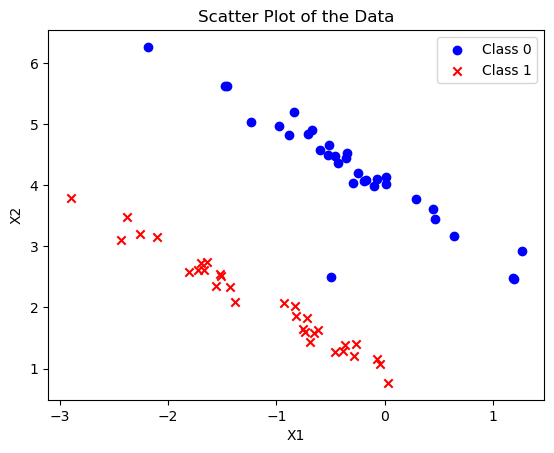

In [53]:
# plot the data
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', marker='o', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', marker='x', label='Class 1')

# style
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of the Data')
plt.legend()  
plt.show()

The data is clearly linearly seperable, but it appears that a support vector classifier will missclassify one data point since it is closer to the opposite class than the rest of its class.
We now use an support vector classifier with linear basis functions and a value of $C=1$ to generate a decision surface.

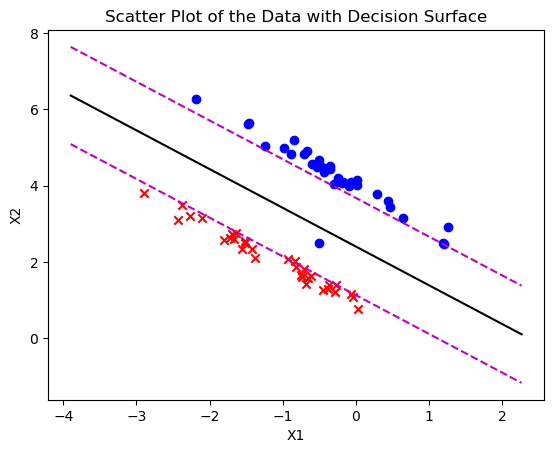

In [54]:
# use scikit learn SVM package to create a classifier with linear bases functions
svm_classifier = SVC(kernel='linear', C=1.0) 

# fit the classifier to our data
svm_classifier.fit(X, y)

# plot the data
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', marker='o', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', marker='x', label='Class 1')

# plot the decision surface
w = svm_classifier.coef_[0]
xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1)
yy = - (svm_classifier.intercept_[0]) / w[1] - (w[0] / w[1]) * xx 

# Plot the decision boundary
plt.plot(xx, yy, 'k-', label = 'Decision Boundary')
plt.plot(xx, yy+1/w[1], 'm--') # margin boundary
plt.plot(xx, yy-1/w[1], 'm--') # margin boundary

# style
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of the Data with Decision Surface')
plt.show()

Since that one blue dot is closer to the red x's than the other blue dots, it is missclassified by the support vector classifier with $C=1$.

### 1(b):
We now look for a value of $C$ where every point is properly classified.

In [55]:
cond = True
c = 1

# try increasing values of C until we find a value where nothing is missclassified
while cond:
    # increment C
    c += 0.1
    # use scikit learn SVM package to create a classifier with linear bases functions
    svm_classifier = SVC(kernel='linear', C=c) 
    # fit the classifier to our data
    svm_classifier.fit(X, y)
    # make predictions
    preds = svm_classifier.predict(X)
    # count missclassifications
    missclassifications = np.where(preds != y)[0]
    cond = len(missclassifications) != 0

c 

3.100000000000002

When $C=3.1$, all of the data points are properly classified. We now plot the decision surface using the value $C=3.1$.

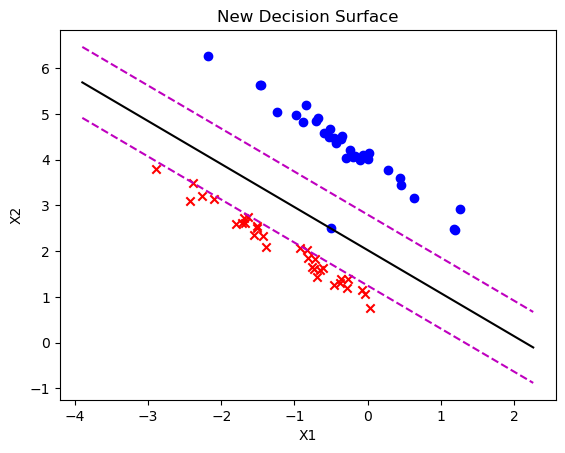

In [56]:
# plot the data
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', marker='o', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', marker='x', label='Class 1')

# plot the decision surface
w = svm_classifier.coef_[0]
xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1)
yy = - (svm_classifier.intercept_[0]) / w[1] -(w[0] / w[1]) * xx 

# Plot the decision boundary
plt.plot(xx, yy, 'k-', label = 'Decision Boundary')
plt.plot(xx, yy+1/w[1], 'm--') # margin boundary
plt.plot(xx, yy-1/w[1], 'm--') # margin boundary

# style
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('New Decision Surface')
plt.show()

The goal of a support vecto classifier is to find the decision boundary that maximizes the distance between the closest data point from each class and the decision boundary. This is acheived in the first model since it places more emphasis on maximizing the margin than accurately classifying the outlier, while the second model places more of an emphasis on accurately classifying the outlier. In the second model, the marginal boundaries are shifted towards the class of red x's rather than maximally seperating the distinct classes, so the first model is better for our data. 

## Problem 2:
We now turn to the dataset hw8/hw8_q2.csv, which is structured like the data from question 1.

In [57]:
# read in the data
X = np.loadtxt('hw8_q2.csv', delimiter=',', usecols=(0, 1), unpack=True, dtype=float)
X = X.T
y = np.loadtxt('hw8_q2.csv', delimiter=',', usecols=(2), unpack=True, dtype=float)

In [58]:
# get the indices for each class
neg_indices = np.where(y == -1)
pos_indices = np.where(y == 1)

class_0 = X[neg_indices]
class_1 = X[pos_indices]

### 2(a):
We begin by using the value $C=1$ to fit a support vector classifier to this data and plot the data with the resulting decision boundary.

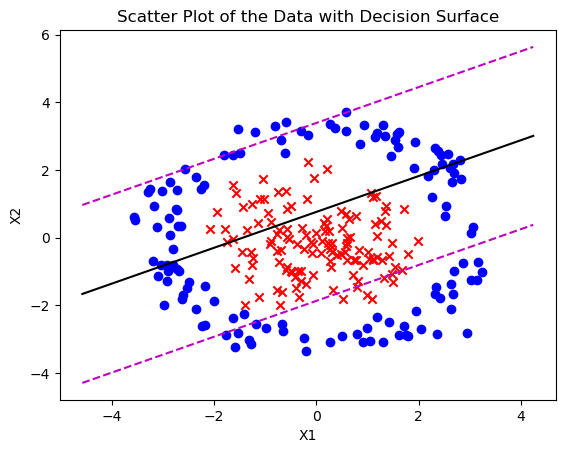

In [59]:
# create SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0) 

# fit the classifier to our data
svm_classifier.fit(X, y)

# plot the data
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', marker='o')
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', marker='x')

# plot the decision surface
w = svm_classifier.coef_[0]
xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1)
yy = - (svm_classifier.intercept_[0]) / w[1] - (w[0] / w[1]) * xx 

# Plot the decision boundary
plt.plot(xx, yy, 'k-') # decision boundary
plt.plot(xx, yy+1/w[1], 'm--') # margin boundary
plt.plot(xx, yy-1/w[1], 'm--') # margin boundary

# style
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of the Data with Decision Surface')
plt.show()

Clearly using linear basis functions will not perform well on this data since it is not linearly seperable.

### 2(b):
To get a better discriminant, we will use Gaussian Basis functions to allow for a non-linear discriminant. We will use four basis functions with the following four centers and bandwidths:
\begin{align}
\mu_{1}&= \begin{bmatrix}0\\0 \end{bmatrix}\\
\mu_{2}&= \begin{bmatrix}-3\\-1\end{bmatrix}\\
\mu_{3}&= \begin{bmatrix}2\\3\end{bmatrix}\\
\mu_{4}&= \begin{bmatrix}3\\-2\end{bmatrix}\\
s_{1}&=3\\
s_{2}&=1\\
s_{3}&=1\\
s_{4}&=2.
\end{align}
The first center is chosen as it is the center of the class of red x's. We give a larger bandwidth to this center since the red x's are not all super closely clustered together. Our next center is chosen since it represents an area where there are observations from the blue class that are clustered closely together. Our third center is chosen the same way, and these two centers have small bandwidth due to the closeness of the observations clustered around thse centers. Our final center is chosen to capture another center of the blue circle class with a slightly higher bandwidth.

In [60]:
# define a function to get the gaussian bases
def gbf(X, center, bandwidth):
    return np.exp(-np.linalg.norm((X - center), axis=1) ** 2) / (2 * (bandwidth ** 2))

In [61]:
# define centers and bandwidths
centers = [np.array([0,0]), np.array([-3,-1]), np.array([2,3]), np.array([3,-2])]
bandwidths = [3,1,1,2]

In [70]:
# define a function to use the gaussian basis functions to transform our data
def transform_data(X):
    return np.column_stack(
        (gbf(X, centers[0], bandwidths[0]), gbf(X, centers[1], bandwidths[1]), gbf(X, centers[2], bandwidths[2]), gbf(X, centers[3], bandwidths[3])
        )
    )

# transform data
X_transformed = transform_data(X)

Now we fit a support vector classifier with a value of $C=1$ to this transformed data and plot the resulting decision boundary.

In [71]:
# create and fit support vector classifier
sv_classifier = SVC(kernel='linear', C=1.0) 
sv_classifier.fit(X_transformed, y)

SVC(kernel='linear')

Now we plot the decision surface of this classifier.

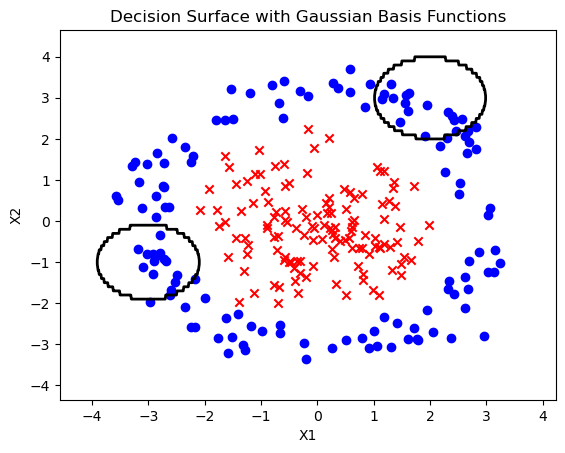

In [72]:
# create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.1))

# use our classifier to make predictions on meshgrid values
Z = sv_classifier.predict(transform_data(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# plot contours of prediction
plt.contour(xx, yy, Z, colors='k', levels=[0], linewidths=2)

# plot the data 
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', marker='o')
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', marker='x')

# style 
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Surface with Gaussian Basis Functions')
plt.show()

Clearly, using these particular gaussian basis functions did not achieve a good classifier.

### 2(c):
Now instead of transforming the data with basis functions, we will use a Gaussian kernel to achieve a non-linear discriminant.

In [73]:
def gaussian_fun(x1, x2, bandwidth):
    return np.exp(-np.linalg.norm(x1 - x2)**2 / (2 * (bandwidth**2)))

# define our gaussian kernel
def gaussian_kernel(X1, X2):
    m = X1.shape[0]
    n = X2.shape[0]
    K = np.zeros((m, n))

    for i in range(m):
        for j in range(n):
            K[i, j] = gaussian_fun(X1[i], X2[j], bandwidth)

    return K

In [74]:
# define kernel bandwidth
bandwidth = 5
# define C value
c = 3
# create and fit the support vector classifier
sv_model = SVC(kernel=gaussian_kernel, C=c)
sv_model.fit(X, y)

SVC(C=3, kernel=<function gaussian_kernel at 0x000001498C006E50>)

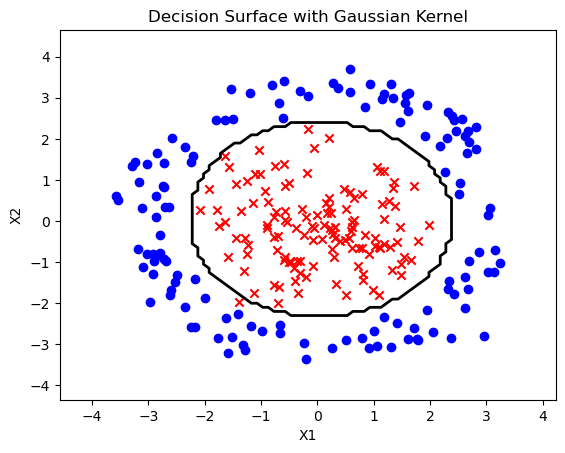

In [75]:
# create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# use our classifier to make predictions on meshgrid values
Z = sv_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot contours of prediction
plt.contour(xx, yy, Z, colors='k', levels=[0], linewidths=2)

# plot the data 
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', marker='o')
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', marker='x')

# style 
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Surface with Gaussian Kernel')
plt.show()

We choose a value $C=3$ and kernel bandwidth $s=5$ to fit both the data and the underlying trend. Since our data has a clear overall structure, we choose large bandwidth to have a smooth and more generalized decision surface. Similarly, to avoid a model that is overly focused on classifying each individual data point correctly and more focused on fitting the structure of the data, we avoid choosing a large value for $C$. 

### 2(d):
Our decision surfaces clearly show that using the Gaussian Kernel performs best for the given dataset. Since our data is not linearly seperable, the first model, which uses linear basis functions, is unable to produce a good decision boundary. The primary difference between using Gaussian basis functions and using a Gaussian kernel is that the basis functions attempt to add non-linearity to the decision surface by transforming the data to a higher dimension while the kernel looks at the distance between data points in the original data space. This last approach works very well on the structure of our data since the classes are not intermixed.

### 2(e):
Given a new unkown dataset, if I could not explore the data first, I would begin by using a Gaussian Kernel function. A Gaussian kernel has the ability to generate a good decision surface on linearly seperable data or non-linearly seperable data and capture different types of relationships between observations. While transforming the data to higher dimensions could allow for even more complex relationships between observations to be captured, using a kernel function is less complex and makes more sense to try first.

## Problem 3:
For this problem, we will use the same dataset as the previous problem, but with the negative $y$ observations changed to $0$. For all layers of every neural network, we will use the actfun activation function below:
\begin{align}
\sigma(x)&=\frac{1}{1-e^{x}}.
\end{align}

In [4]:
# read in the data
X = np.loadtxt('hw8_q3.csv', delimiter=',', usecols=(0, 1), unpack=True, dtype=float)
y = np.loadtxt('hw8_q3.csv', delimiter=',', usecols=(2), unpack=True, dtype=float)

In [5]:
# get the indices for each class
neg_indices = np.where(y == 0)
pos_indices = np.where(y == 1)

class_0 = X[:, neg_indices]
class_1 = X[:, pos_indices]

### 3(a):
We begin by fitting a neural network with a single hidden layer of size $10$. This means that our predictions are found by the following function:
\begin{align}
y&=\sum_{i=0}^{10}\sigma(w_{0}+w_{1}x_{1}+w_{2}x_{2})
\end{align}
for weights $w_{0}, w_{1},$ and $w_{2}$. We will use gradient descent to find the weights.

In [49]:
# implement the functions necessary for a neural network
# activation function
def actfun(s):
    return 1 / (1 + np.exp(-s))

# derivative of the activation function
def dactfun(s):
    sig = actfun(s)
    return s * (1 - s)

# gradient descent function
def gradient_descent(x, y, W, b):
    # Print initial objective value
    v = neuralnet_lossfun(x, y, W, b)
    print(f'{0:6d}   {v}')

    eta = 0.1
    for i in range(1, 10001):
        dW, db = neuralnet_gradient(x, y, W, b)
        for l in range(len(W)):
            W[l] = W[l] - eta * dW[l]
            b[l] = b[l] - eta * db[l]

        v = neuralnet_lossfun(x, y, W, b)
        if i % 100 == 0:
            print(f'{i:6d}   {v}')

    return W, b

def neuralnet_lossfun(x, y, W, b):
    v = 0
    for p in range(x.shape[1]):
        h = neuralnet_predict(x[:, p], W, b)
        v = v + (h - y[p]) ** 2
    return v

def neuralnet_predict(x, W, b):
    for l in range(len(W)):
        x = actfun(b[l] + np.dot(W[l].T, x.T))
    return x

def neuralnet_gradient(x, y, W, b):
    L = len(W)
    dW = [np.zeros_like(W[l]) for l in range(L)]
    db = [np.zeros_like(b[l]) for l in range(L)]
    s = [None] * L
    z = [None] * L
    d = [None] * L

    n = x.shape[1]
    for p in range(n):
        
        # forward propogation
        temp = x[:, p]
        for l in range(L):
            s[l] = b[l].flatten() + W[l].T @ temp
            z[l] = actfun(s[l])
            temp = z[l]
            # print(temp.shape)
            # assert temp.shape == (10,p)

        # back propogation to compute sensitivities
        d[L - 1] = dactfun(s[L - 1])
        for l in range(L - 2, -1, -1):
            d[l] = (W[l + 1] @ d[l + 1]) * dactfun(s[l])


        errorfun_factor = 2 * (z[L - 1] - y[p])
        temp = x[:, p]
        print(x.shape)
        print(p)
        for l in range(L):
            # print(temp.shape)
            # print(d[l].shape)
            # print(errorfun_factor.shape)
        #### this is where the trouble is ####
            # dW[l] +=  temp @ d[l].T * errorfun_factor
            dw[l] = temp @ d[l].T
            db[l] += d[l] * errorfun_factor
            temp = z[l]
            # assert temp.shape == (n,2)

    return dW, db

In [7]:
# number of layers
L = 2
W = [None] * L
W[0] = np.random.rand(2,10) - 0.5
W[1] = np.random.rand(10,1) - 0.5
b = [None] * L
b[0] = np.random.rand(10,1) - 0.5
b[1] = np.random.rand(1,1) - 0.5

In [50]:
W, b = gradient_descent(X,y,W,b)

     0   [[64.2077295  64.35617839 64.26734825 64.22233536 64.286311   64.20810329
  64.27568488 64.26150092 64.22211216 64.22722294]]
(2, 256)
0


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 2)